In my tweet classifier [post](https://monicamow.github.io/funding-secured.html) I used Naive Bayes to distinguish between tweets from [@BoredElonMusk](https://twitter.com/BoredElonMusk) and [@elonmusk](https://twitter.com/elonmusk). In this post, I use a Random Forest Classifier to see if the results improve. Surprisingly, the Random Forest Classifier does **_worse_** than the Naive Bayes Classifier. I will have to look into some of the machine learning theory to investigate why this is so. For now, here are the Random Forest results.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
data_df = pd.read_csv('data_exported.csv')

In [9]:
# recode screen name as 0/1
# 0 for BoredElonMusk
# 1 for elonmusk
data_df.loc[data_df['Screen Name'] == 'BoredElonMusk', 'who_is_it'] = 0
data_df.loc[data_df['Screen Name'] == 'elonmusk', 'who_is_it'] = 1

data_df['who_is_it'] = data_df['who_is_it'].astype(np.int64)

In [10]:
data_df['tweet_cleaned'] = data_df['tweet_cleaned'].fillna(' ')

X_text = data_df['tweet_cleaned'].tolist()
y = data_df['who_is_it']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# convert content of string into vector of numbers using TF-IDF
vec = TfidfVectorizer()
X = vec.fit_transform(X_text)

# split into training and test samples
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1991)

# fit the model
model = RandomForestClassifier(n_estimators=100, random_state=1991)
model.fit(Xtrain, ytrain);

In [6]:
# predict test sample
ypred = model.predict(Xtest)

As can be seen in the first column from the table below, the model's prediction is only about 84% accurate overall. The accuracy score for the Naive Bayes Classifier was 88%. The classification report is better than just using the `accuracy_score` metric because it allows you to see the prediction accuracy by category. The first row shows that tweets from BoredElonMusk were predicted with only 78% accuracy. Predictions for elonmusk did much better at 89%.

In [13]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       0.78      0.89      0.83       228
          1       0.89      0.79      0.84       272

avg / total       0.84      0.84      0.84       500



We can also look at the confusion matrix again to see the prediction accuracy in count form. It would appear that tweets from BoredElonMusk are now more difficult to classify, with 202 correct predictions out of 258. Previously, the Naive Bayes Classifier did better on tweets from BoredElonMusk with 234/258 correct predictions. There were 216/242 correct predictions on tweets from elonmusk. In comparison, the Naive Bayes classifier only got 206/242 correct predictions on elonmusk.

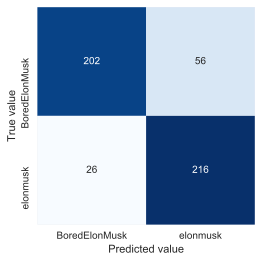

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

labels = model.classes_

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues', fmt='g', 
            xticklabels=['BoredElonMusk', 'elonmusk'], yticklabels=['BoredElonMusk', 'elonmusk'])
plt.xlabel('Predicted value')
plt.ylabel('True value');

%config InlineBackend.figure_format = 'svg'